# Project- Applied Stats- Problem Statement-1

#Shivaprasad - Sept sun Grp 1

## Attribute Information:
#age​: age of primary beneficiary
#sex​: insurance contractor gender, female, male
#bmi​: Body mass index, providing an understanding of body, weights that are relatively high or low relative to #height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
#children​: Number of children covered by health insurance / Number of dependents
#smoker​: Smoking
#region​: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
#charges​: Individual medical costs billed by health insurance.

# #Objective

We want to see if we can dive deep into this data to find some valuable insights.

In [189]:
#TODO - Statistically prove the visual plot inferences.
#TODO - Re- check all the points for inferences and plot against - category to visual representation does match and makes sense

In [190]:
import numpy as np
import scipy.stats as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# add labelencoder
from sklearn import preprocessing 

In [191]:
df_data = pd.read_csv('/Volumes/SDCARD/Greatlearning/Assignment1/insurance.csv')

In [192]:
df_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [193]:
df_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [194]:
#Shape of the data
print ('Shape of the data is '+ str(df_data.shape))

Shape of the data is (1338, 7)


In [195]:
#Data type of each object_1

print ('Data type of each object as below')
print (df_data.info())

Data type of each object as below
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


# Missing value presence

In [196]:
# missing value presence

print ('XXXXXX NA XXXXXXXX')
print (df_data.isna().sum())
print ('')
print ('XXXXXX NULL XXXXXXX')
print (df_data.isnull().sum())
print ('All the row values and dataframe shape (row value) is equal- hence no missing value present')

XXXXXX NA XXXXXXXX
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

XXXXXX NULL XXXXXXX
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
All the row values and dataframe shape (row value) is equal- hence no missing value present


## 5 point summary of numerical attributes

In [197]:
# 5 point summary of numerical attributes

print ('Below frame consist of numerical attributes ')
print ('----------------------------------------------')
print (df_data.describe())

Below frame consist of numerical attributes 
----------------------------------------------
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


## Disturbution of numerical age,bmi and charges

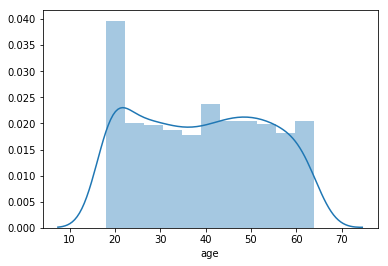

In [198]:
sb.distplot(df_data.age)

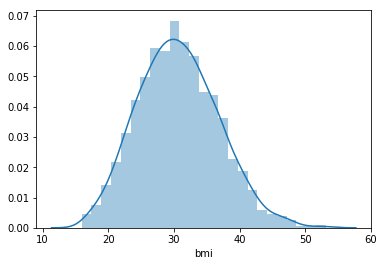

In [199]:
sb.distplot(df_data.bmi)

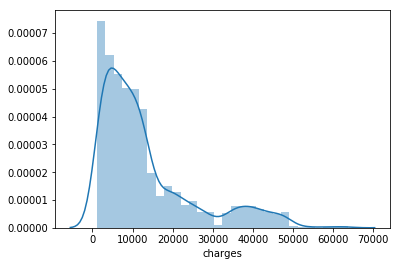

In [200]:
sb.distplot(df_data.charges)

## Measure of skew

In [201]:
#Measure of skew

print ('Skewness of bmi')
print (sp.skew(df_data.bmi))
print ('Skewness of age')
print (sp.skew(df_data.age))
print ('Skewness of charges')
print (sp.skew(df_data.charges))

Skewness of bmi
0.28372857291709386
Skewness of age
0.055610083072599126
Skewness of charges
1.5141797118745743


## Outliers detection for columns 

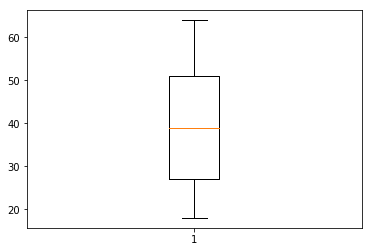

In [202]:
## Outliers detection for columns - age, bmi and charge

plt.boxplot(df_data.age)
plt.show()

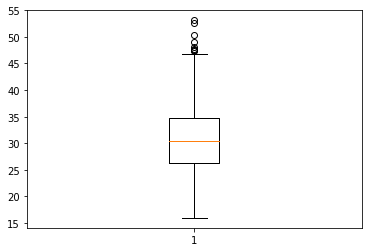

In [203]:
plt.boxplot(df_data.bmi)
plt.show()

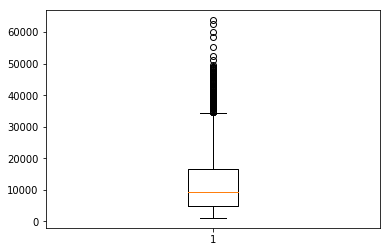

In [204]:
plt.boxplot(df_data.charges)
plt.show()

### Categorical data encodings -Using Label encoding

In [205]:
le = preprocessing.LabelEncoder()

df_data['sex_1'] = le.fit_transform(df_data.sex)
df_data['smoker_1'] = le.fit_transform(df_data.smoker)
df_data.region = le.fit_transform(df_data.region)

In [206]:
df_data.head()

,age,sex,bmi,children,smoker,region,charges,sex_1,smoker_1
0,19,female,27.900,0,yes,3,16884.92400,0,1
1,18,male,33.770,1,no,2,1725.55230,1,0
2,28,male,33.000,3,no,2,4449.46200,1,0
3,33,male,22.705,0,no,1,21984.47061,1,0
4,32,male,28.880,0,no,1,3866.85520,1,0


## Disturbution of categorical columns

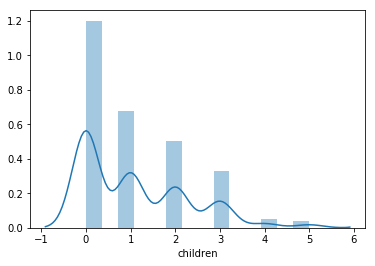

In [207]:
## Disturbution of categorical columns

sb.distplot(df_data.children)

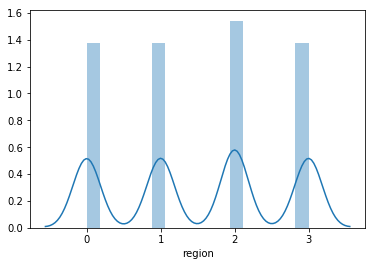

In [208]:
sb.distplot(df_data.region)

## Pair plot

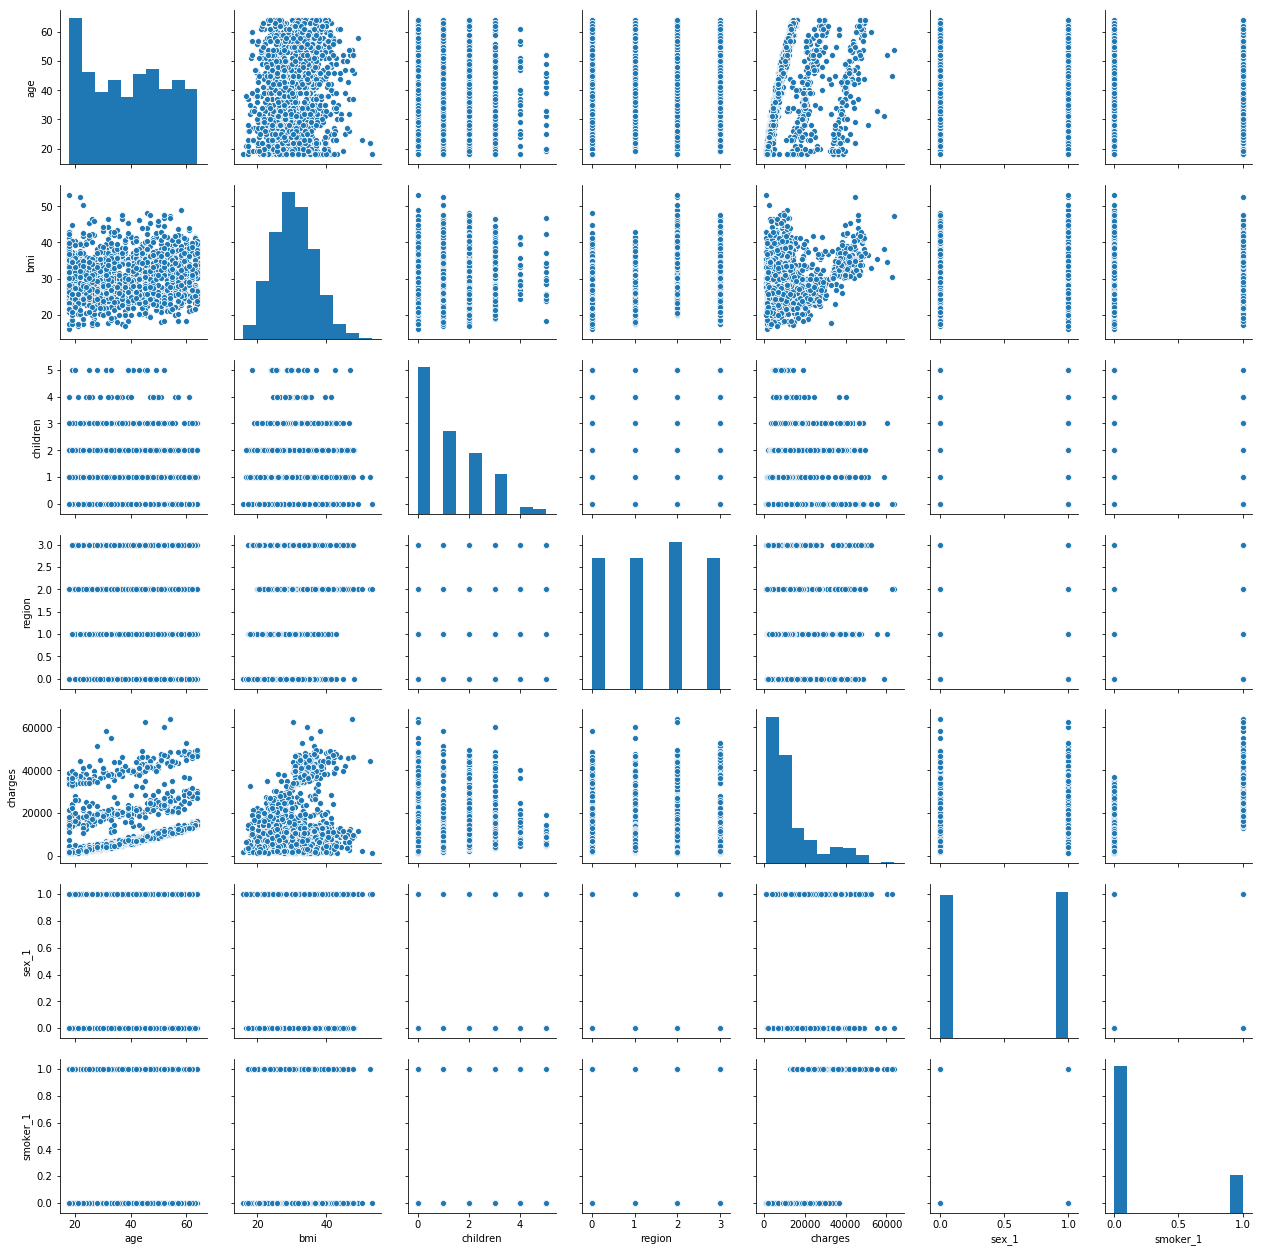

In [209]:
# pair plot

sb.pairplot(df_data)

## Question -4 
## i) Do charges of people who smoke differ significantly from the people who don't?

#Hypothesis statement

### Ho - For smokers charges differ significantly to Nonsmokers
### Ha - For nonsmoker charges not differ significantly equal to smokers

In [210]:
# Normalizing the charges column
df_data['charges_norm']= np.log(df_data.charges)

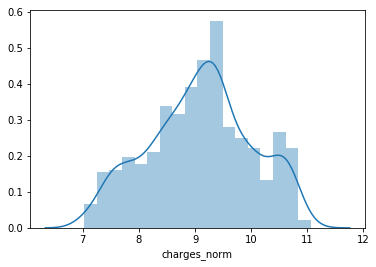

In [211]:
# Viewing the normalized charges columns- Look like normal disturbution
sb.distplot(df_data.charges_norm)

In [212]:
# Calculating the overall mean of charges
overall_mean_charges = np.log(df_data.charges_norm)
overall_mean_charges.mean()

2.2029291685882244

### Taking two sample data: Splitting the data from column smoke
### 1 - Smoker list with charges 
### 2 - Non-Smoker with charges

In [213]:
smoker_list_charges = []
nonsmoker_list_charges = []


for i in range(0,len(df_data.smoker)):
    if (df_data.smoker[i]=='yes'):
        #print (i)
        smoker_list_charges.append(df_data.charges_norm[i])
    else:
        nonsmoker_list_charges.append(df_data.charges_norm[i])

#smoker_list_charges
#nonsmoker_list_charges

In [214]:
#Calculating mean of both samples in the list
print ('smoker mean '+ str(np.mean(smoker_list_charges)))
print ('non smoker mean '+ str(np.mean(nonsmoker_list_charges)))

smoker mean 10.304109568020342
non smoker mean 8.78823247963606


smoker standard deviation 0.3868137851650984
nonsmoker standard deviation 0.7438925139449252


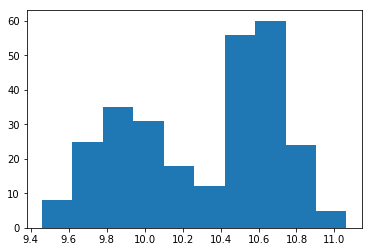

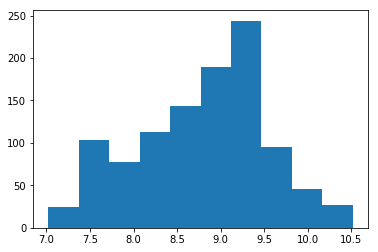

In [215]:
# Calculating the standard deviation and plot the samples
print ('smoker standard deviation '+ str(np.std(smoker_list_charges)))
print ('nonsmoker standard deviation '+ str(np.std(nonsmoker_list_charges)))

plt.show()
plt.hist(smoker_list_charges)
plt.show()
plt.hist(nonsmoker_list_charges)
plt.show()


In [216]:
# Getting the pvalue for two samples to check the hypothesis
print (sp.ttest_ind(smoker_list_charges,nonsmoker_list_charges))

Ttest_indResult(statistic=32.59024275645899, pvalue=6.307646357177964e-172)


#### Since the pvalue is lager than 5%- Null hypothesis cannot be rejected
### Ho - For smokers charges differ significantly to Nonsmokers

## Question -4 
## ii) Does bmi of males differ significantly from that of females?

#Hypothesis statement

### Ho - males bmi differ significantly to female bmi
### Ha - males bmi not differ significantly to female bmi 

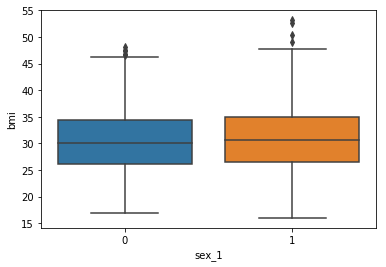

In [217]:
sb.boxplot(df_data.sex_1,df_data.bmi)

In [218]:
bmi_list_males = []
bmi_list_female = []


for i in range(0,len(df_data.smoker)):
    if (df_data.sex[i]=='male'):
        #print (i)
        bmi_list_males.append(df_data.bmi[i])
    else:
        bmi_list_female.append(df_data.bmi[i])
        
#bmi_list_males
#bmi_list_female

In [219]:
# Calculate the overall bmi mean
print (df_data.bmi.mean())

30.663396860986538


In [220]:
# Calculate the bmi mean for male and female
print ('BMI mean for males '+ str(np.mean(bmi_list_males)))
print ('BMI mean for females '+ str(np.mean(bmi_list_female)))

BMI mean for males 30.943128698224854
BMI mean for females 30.37774924471299


In [221]:
# Getting the pvalue for two samples to check the hypothesis
print (sp.ttest_ind(bmi_list_males,bmi_list_female))

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)


#### Since the pvalue is lager than 5%- Null hypothesis cannot be rejected
### Ho -  males bmi differ significantly to female bmi

## iii) Is the proportion of smokers significantly different in different genders?

#Hypothesis statement

### Ho - males have higher proportion of smoker to females
### Ha - males not have higher proportion of smoker to females

In [222]:
# Have a sample for  smoker females and smoker females

smoker_females = []
smoker_males = []


for i in range(0,len(df_data.smoker_1)):
    if (df_data.smoker[i]=='yes'):
        if (df_data.sex[i]=='male'):
            smoker_males.append(i)
        else:
            smoker_females.append(i)     

#smoker_females
#smoker_males

In [223]:
# Calculate the smoker mean for male and female
print ('smoker mean for males '+ str(np.mean(smoker_males)))
print ('smoker mean for females '+ str(np.mean(smoker_females)))

smoker mean for males 655.3270440251572
smoker mean for females 696.1739130434783


In [224]:
# Run ttest to find the p value
print (sp.ttest_ind(smoker_males,smoker_females))

Ttest_indResult(statistic=-0.821281179472192, pvalue=0.41220537362015464)


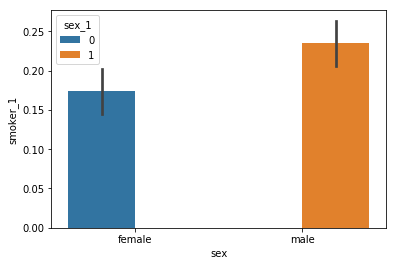

In [225]:
sb.barplot(df_data.sex,(df_data.smoker_1), hue=df_data.sex_1)

#Result

#### Since the pvalue is lager than 5%- Null hypothesis cannot be rejected
### Ho -  males have higher proportion of smoker to females


##  Is the distribution of bmi across women with no children, one child and two children, the same ?

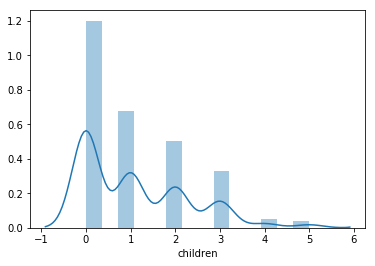

In [227]:
sb.distplot(df_data.children)

In [238]:
#Filter the woman data
df_women_data = df_data[df_data.sex=='female']
df_women_data.reset_index(drop=True)

,age,sex,bmi,children,smoker,region,charges,sex_1,smoker_1,charges_norm
0,19,female,27.900,0,yes,3,16884.92400,0,1,9.734176
1,31,female,25.740,0,no,2,3756.62160,0,0,8.231275
2,46,female,33.440,1,no,2,8240.58960,0,0,9.016827
3,37,female,27.740,3,no,1,7281.50560,0,0,8.893093
4,60,female,25.840,0,no,1,28923.13692,0,0,10.272397
5,62,female,26.290,0,yes,2,27808.72510,0,1,10.233105
6,56,female,39.820,0,no,2,11090.71780,0,0,9.313864
7,52,female,30.780,1,no,0,10797.33620,0,0,9.287055
8,60,female,36.005,0,no,0,13228.84695,0,0,9.490155
9,30,female,32.400,1,no,3,4149.73600,0,0,8.330800


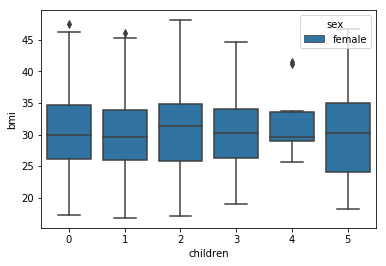

In [253]:
#sb.barplot(df_data.children,df_data.bmi,df_data.sex)
sb.boxplot(df_women_data.children,df_women_data.bmi,df_women_data.sex)

In [251]:
df_women_data.children.value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: children, dtype: int64

In [241]:
df_women_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 1337
Data columns (total 10 columns):
age             662 non-null int64
sex             662 non-null object
bmi             662 non-null float64
children        662 non-null int64
smoker          662 non-null object
region          662 non-null int64
charges         662 non-null float64
sex_1           662 non-null int64
smoker_1        662 non-null int64
charges_norm    662 non-null float64
dtypes: float64(3), int64(5), object(2)
memory usage: 76.9+ KB


In [250]:
bmi_nokids=[]
bmi_with_1_kid =[]
bmi_with_2_kid =[]
bmi_with_3_kid =[]
bmi_with_4_kid =[]
bmi_with_5_kid =[]


for i in df_women_data.children:
    if (i==0):
        bmi_nokids.append(df_data.bmi[i])
    elif (i==1):
        bmi_with_1_kid.append(df_data.bmi[i])
    elif (i==2):
        bmi_with_2_kid.append(df_data.bmi[i])
    elif (i==3):
        bmi_with_3_kid.append(df_data.bmi[i])
    elif (i==4):
        bmi_with_4_kid.append(df_data.bmi[i])
    elif (i==5):
        bmi_with_5_kid.append(df_data.bmi[i])
    

#bmi_withkids          

In [247]:
print ('Mean of each sample')
print ('--------------------')
print ('Mean of No Children - '+ str (np.mean(bmi_nokids)))
print ('Mean of one Children - '+ str (np.mean(bmi_with_1_kid)))
print ('Mean of two Children - '+ str (np.mean(bmi_with_2_kid)))
print ('Mean of three Children - '+ str (np.mean(bmi_with_3_kid)))
print ('Mean of four Children - '+ str (np.mean(bmi_with_4_kid)))
print ('Mean of five Children - '+ str (np.mean(bmi_with_5_kid)))

Mean of each sample
--------------------
Mean of No Children - 27.900000000000002
Mean of one Children - 33.769999999999996
Mean of two Children - 33.0
Mean of three Children - 22.70499999999999
Mean of four Children - 28.88
Mean of five Children - 25.74


In [252]:
print ('Std of each sample')
print ('--------------------')
print ('Std of No Children - '+ str (np.std(bmi_nokids)))
print ('Std of one Children - '+ str (np.std(bmi_with_1_kid)))
print ('Std of two Children - '+ str (np.std(bmi_with_2_kid)))
print ('Std of three Children - '+ str (np.std(bmi_with_3_kid)))
print ('Std of four Children - '+ str (np.std(bmi_with_4_kid)))
print ('Std of five Children - '+ str (np.std(bmi_with_5_kid)))

Std of each sample
--------------------
Std of No Children - 3.552713678800501e-15
Std of one Children - 7.105427357601002e-15
Std of two Children - 0.0
Std of three Children - 7.105427357601002e-15
Std of four Children - 0.0
Std of five Children - 0.0


#Result

### The bmi across women sample mean are not the same for no children and one children and two children is not the same.